<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/02_01_mnist_slp_tf2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 2-1 :  tf.keras 모듈을 이용한 Single Layer Perceptron 설계하기** 


- 이미지 분류(Image Classification)를 위한 뉴럴 네트워크를 SLP로 설계한다


## **Import Module**

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)
print (tf.keras.__version__)

2.0.0
2.2.4-tf


## **DataSet**

### Load

In [0]:
# MNIST dataset loading and normalizing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)


### Preview

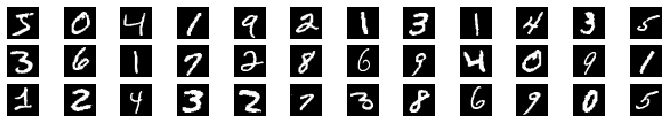

In [0]:
plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

## **Model**

### Define

In [0]:
# Sequential - design layers _ parameter : methode를 사용하지 않고 하는 방법! 게다가 이름도 안 주고 간단하게 불러옴 (p.73)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compile

In [0]:
model.compile(optimizer='adam',                         # AdamOptimizer
              loss='sparse_categorical_crossentropy',   # CEE(Cross Entropy Error)
              metrics=['accuracy'])                     # Accuracy를 return으로 받아옴!

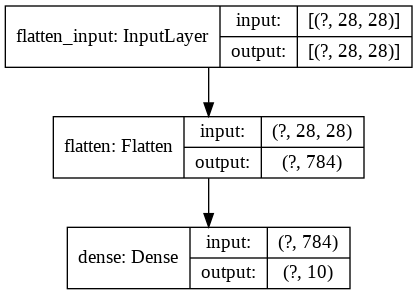

In [0]:
tf.keras.utils.plot_model(model, 'my_model.png', show_shapes=True)

### Fit

Epoch 20/20
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2912 - accuracy: 0.9200
CPU times: user 7.56 s, sys: 419 ms, total: 7.98 s   
Wall time: 6.06 s  (@Notebook Setting/GPU)

In [0]:
%%time
history = model.fit(x_train, y_train, 
                    batch_size=512, epochs=30, 
                    validation_data=(x_test, y_test)
                    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 23us/sample - loss: 1.1376 - accuracy: 0.7225 - val_loss: 0.6281 - val_accuracy: 0.8633
Epoch 2/30
60000/60000 [==============================] - 0s 8us/sample - loss: 0.5466 - accuracy: 0.8687 - val_loss: 0.4543 - val_accuracy: 0.8915
Epoch 3/30
60000/60000 [==============================] - 0s 8us/sample - loss: 0.4374 - accuracy: 0.8892 - val_loss: 0.3894 - val_accuracy: 0.8996
Epoch 4/30
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3880 - accuracy: 0.8976 - val_loss: 0.3555 - val_accuracy: 0.9071
Epoch 5/30
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3593 - accuracy: 0.9043 - val_loss: 0.3352 - val_accuracy: 0.9104
Epoch 6/30
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3398 - accuracy: 0.9083 - val_loss: 0.3203 - val_accuracy: 0.9128
Epoch 7/30
60000/60000 [==============================] - 0s 

### Evaluate

In [0]:
model.evaluate(x_test,  y_test, verbose=0)  # 손실값, 정확도 (scalar값으로 리이이이턴)

[0.26448198847770693, 0.9269]

## **Analysis**

### Plot

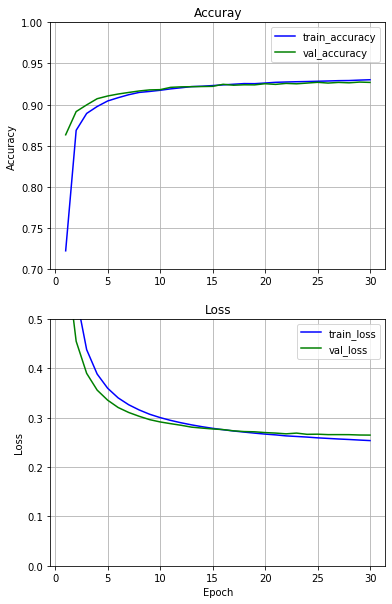

In [0]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

### Prediction

In [0]:
# 테스트셋 첫 이미지 예측정보
print (model.predict(x_test[:1, :]))

[[1.5313512e-05 2.1562878e-10 3.0039981e-05 5.9075649e-03 5.3687864e-07
  3.6843016e-05 2.7500877e-09 9.9358022e-01 2.3832325e-05 4.0558717e-04]]


In [0]:
# 데스트셋 첫 이미지 분류
print (model.predict_classes(x_test[:1, :], verbose=0))

[7]


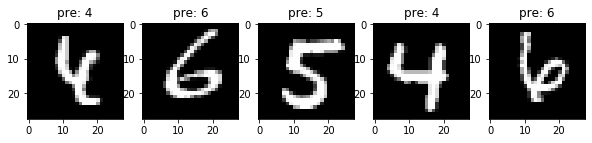

In [0]:
n = 160
plt.figure(figsize=(10, 2))
for i in range(5):
  img_idx = n+i
  predict = model.predict(x_test[img_idx:img_idx+1, :])
  img = x_test[img_idx]
  plt.subplot(1,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.title('pre: {}'.format(np.argmax(predict)))

plt.show()

## **Model save**

### Save model

In [0]:
model.save('my_model.hdf5')
# delete
del model

NameError: ignored

### Load model

In [0]:
from tensorflow.keras.models import load_model

model2 = load_model('my_model.hdf5')
print(model2.predict_classes(x_test[:1, :], verbose=0))

[7]


In [0]:
# chkeck a loaded mode
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## **실습과제**

### 과제1 여러 type으로 model을 만들어 보자
#### -- `Sequential`의 다른 방식을 이용하여 model_2를 만들고 `name=`을 설정하여 구분하도록 해보자
#### -- `Model`을 이용하여 model_3을 만들고 model name을 설정하여 보자

In [30]:
# 1 : Sequential
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

model_1.summary()
print()

# 2 : Sequential - parameter
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_2.summary()
print()

# 3
inputs = tf.keras.Input(shape=(28, 28), name='handwritten')
x =  tf.keras.layers.Flatten()(inputs)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=outputs, name='hidoyi')

model_3.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

Model: "hidoyi"
________

### 과제2 Reload한 모델을 사용해서 prediction 실행해 보자 
#### -- 아래에 prediction 세번째 cell을 복사해 두었다. 다시 실행되도록 수정해 보자. 

#### -- 과정과 결과를 기록하자 : 

In [0]:
n = 160
plt.figure(figsize=(10, 2))
for i in range(5):
  img_idx = n+i
  predict = model.predict(x_test[img_idx:img_idx+1, :])
  img = x_test[img_idx]
  plt.subplot(1,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.title('pre: {}'.format(np.argmax(predict)))

plt.show()

NameError: ignored

<Figure size 720x144 with 0 Axes>

### 과제3 delete된 모델을 다시 fit하고 싶다 
#### -- 런타임을 재시작 하지 않고 하려면 어떻게 해야 하는가? 
#### -- 어느 단계부터 실행하면 문제가 없을까? 
#### -- 확인 결과를 기록하자 : 